<a href="https://colab.research.google.com/github/sangeetaisaac/Machine-Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simple Linear Regression





In [1]:
import os
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)
os.chdir('/content/gdrive/MyDrive/Interview Kickstart')

Mounted at /content/gdrive


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
tv_dataset= pd.read_csv('tvmarketing.csv')
tv_dataset.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [ ]:
tv_dataset.shape

(200, 2)

###Visualizing the data using a scatter plot

[]

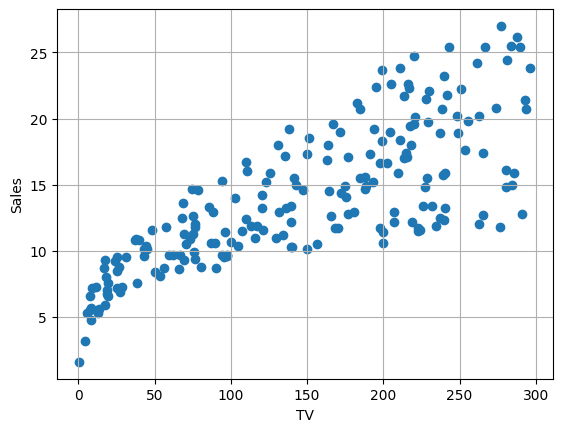

In [ ]:
plt.scatter(tv_dataset['TV'], tv_dataset['Sales'])
plt.xlabel('TV')
plt.ylabel('Sales')
plt.grid(True)
plt.plot()

###Splitting the data into Training and Testing

In [ ]:
X = np.array(tv_dataset['TV'])
Y = np.array(tv_dataset['Sales'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75, random_state=0)

###Training the data using Linear Regression model


In [ ]:
model = LinearRegression()
model.fit(X_train.reshape(-1,1), Y_train)

LinearRegression()

In [ ]:
X_train

array([109.8, 229.5, 253.8, 184.9,  44.7,  62.3, 292.9, 172.5, 202.5,
         7.3, 265.2, 197.6, 218.5, 147.3, 171.3, 217.7, 262.7, 163.5,
       100.4,  76.3, 184.9, 134.3, 273.7, 296.4,  96.2, 109.8, 255.4,
       204.1, 240.1, 193.7, 191.1,  89.7,  43. ,  38.2,  13.1, 239.3,
        17.2, 210.7,  25.6, 177. , 206.9,  66.1, 149.7, 129.4,  94.2,
       276.7, 276.9,   7.8, 250.9, 175.7,  11.7,  75.5, 199.8, 230.1,
       107.4, 225.8, 163.3, 131.1, 206.8, 177. , 216.8,  66.9, 227.2,
       193.2,  97.5,  85.7, 228.3, 139.5,  48.3, 218.4, 195.4,   5.4,
       238.2, 216.4, 222.4,  27.5, 151.5, 139.2, 117.2, 283.6,  57.5,
       237.4, 213.5,  18.8,   4.1, 164.5,  93.9,  28.6, 232.1, 214.7,
        19.4, 280.2, 290.7, 136.2,  69. ,  44.5, 141.3, 188.4, 293.6,
       137.9,   8.4, 168.4, 281.4,  43.1, 219.8, 182.6, 149.8, 220.3,
        95.7, 248.8,  78.2, 121. , 112.9,  17.9,  80.2, 248.4,  97.2,
       220.5, 284.3, 243.2,  70.6, 135.2,  75.3, 116. ,  75.1,  38. ,
       166.8,  26.8,

###Print the Intercept and Slope
#####ypred = a + b * x



In [ ]:
print(f'a =', model.intercept_)
print(f'b =', model.coef_)

a = 7.248909283005854
b = [0.04614341]


###Make Predictions using the model on the test set

In [ ]:
Y_pred = model.predict(X_test.reshape(-1,1))
Y_pred.shape

(50,)

###Visualizing the predictions using a Scatter plot

[]

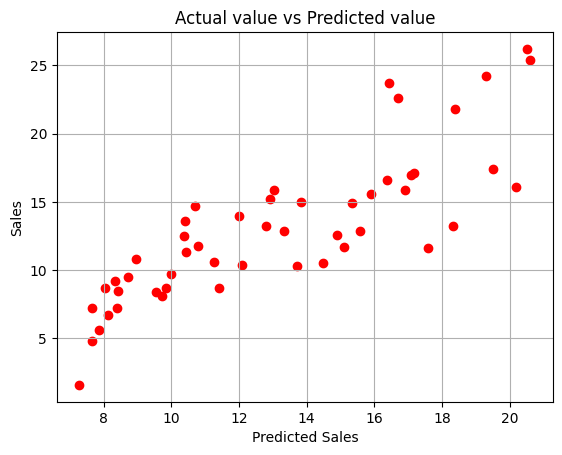

In [ ]:
plt.scatter(Y_pred, Y_test, color = 'red')
plt.title('Actual value vs Predicted value')
plt.xlabel('Predicted Sales')
plt.ylabel('Sales')
plt.grid(True)
plt.plot()

###Mean squared error computation

In [ ]:
mse = mean_squared_error(Y_test, Y_pred)
print(mse)

8.730248872947453


###r2 value computation

In [ ]:
r2 = r2_score(Y_test, Y_pred)
print(r2)

0.6902574858002379


###Visualize the error terms

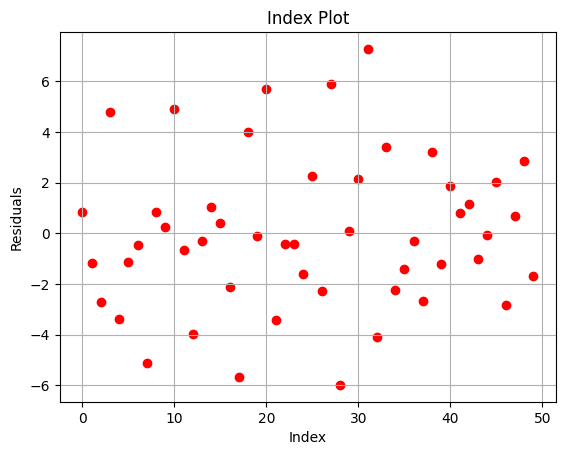

In [ ]:
plt.scatter([x for x in range(Y_test.shape[0])], Y_test - Y_pred, color='red', linewidth= 1, linestyle = "-")
plt.title('Index Plot')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.grid(True)

#Multiple Linear Regression

In [4]:
housing_dataset= pd.read_csv('Boston.csv')
housing_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


####Observations
#####Price of the house is indicated by variable MEDV, which is the independant variable. The price can be predict using the dependant variables.

In [7]:
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [9]:
housing_dataset.shape

(506, 13)


ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: nitric oxides concentration (parts per 10 million)

RM: average number of rooms per dwelling

AGE: proportion of owner-occupied units built prior to 1940

DIS: weighted distances to ﬁve Boston employment centers

RAD: index of accessibility to radial highways

TAX: full-value property-tax rate per $10,000

PTRATIO: pupil-teacher ratio by town 12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. LSTAT: % lower status of the population

MEDV: Median value of owner-occupied homes in $1000s


###Observations
####There are a total of 506 rows which are all non-null
####Every column has a numeric datatype


##Exploratory Data Analysis

###Summary statistics of the Data set

In [12]:
housing_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


###Check correlation  of fetaures using Heatmap

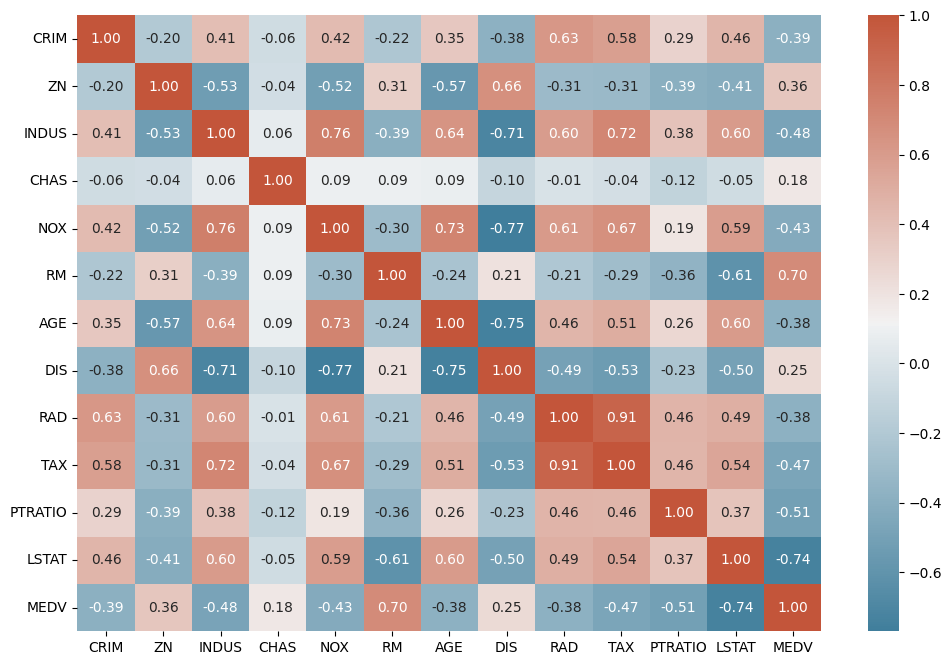

In [20]:
plt.figure(figsize=(12,8))
cmap = sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(housing_dataset.corr(),annot=True, fmt='.2f', cmap=cmap)
plt.show()